In [1]:
import pandas as pd
import yfinance as yf
import requests
import torch
print("Setup successful!")

Setup successful!


## setup project environemnt

In [4]:
import os
import sys

# Move up two levels to reach 'finance_agent' root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one level
if project_root not in sys.path:
    sys.path.append(project_root)

# Verify the path added
print("Updated sys.path:", sys.path)

### test stock tools

In [36]:
from tools.stock_market_tool import StockMarketTool

# Test real-time stock retrieval
stock_data = StockMarketTool.get_stock_price("AAPL")
print("Live Stock Data:", stock_data)

# Test historical stock retrieval
historical_data = StockMarketTool.get_historical_stock("AAPL", days=15)
print("Historical Stock Data:", historical_data[:5])  # Print first 5 records for readability

Live Stock Data: {'ticker': 'AAPL', 'latest_price': np.float64(227.65), 'high': np.float64(230.59), 'low': np.float64(227.2), 'volume': 31628923, 'timestamp': '2025-02-11 00:41:39.159736'}
Historical Stock Data: [{'Open': 224.02000427246094, 'High': 232.14999389648438, 'Low': 223.97999572753906, 'Close': 229.86000061035156, 'Volume': 94863400}, {'Open': 230.85000610351562, 'High': 240.19000244140625, 'Low': 230.80999755859375, 'Close': 238.25999450683594, 'Volume': 75707600}, {'Open': 234.1199951171875, 'High': 239.86000061035156, 'Low': 234.00999450683594, 'Close': 239.36000061035156, 'Volume': 45486100}, {'Open': 238.6699981689453, 'High': 240.7899932861328, 'Low': 237.2100067138672, 'Close': 237.58999633789062, 'Volume': 55658300}, {'Open': 247.19000244140625, 'High': 247.19000244140625, 'Low': 233.44000244140625, 'Close': 236.0, 'Volume': 101075100}]


### test crypto tools

In [37]:
from tools.crypto_market_tool import CryptoMarketTool

# Initialize tool
crypto_tool = CryptoMarketTool()

# Test real-time crypto retrieval
crypto_data = crypto_tool.get_crypto_price("BTC/USDT")
print("Live Crypto Data:", crypto_data)

# Test historical crypto retrieval
historical_crypto = crypto_tool.get_historical_crypto("BTC/USDT", days=15)
print("Historical Crypto Data:", historical_crypto[:5])  # Print first 5 records for readability

Live Crypto Data: {'symbol': 'BTC/USDT', 'latest_price': 97992.31, 'high': 98345.0, 'low': 95256.0, 'volume': 1968759350.11, 'timestamp': '2025-02-11 00:41:47'}
Historical Crypto Data: [{'timestamp': '2025-01-28', 'open': 102082.83, 'high': 103800.0, 'low': 100272.68, 'close': 101335.52, 'volume': 22022.05765}, {'timestamp': '2025-01-29', 'open': 101335.52, 'high': 104782.68, 'low': 101328.01, 'close': 103733.24, 'volume': 23155.35802}, {'timestamp': '2025-01-30', 'open': 103733.25, 'high': 106457.44, 'low': 103278.54, 'close': 104722.94, 'volume': 19374.07472}, {'timestamp': '2025-01-31', 'open': 104722.94, 'high': 106012.0, 'low': 101560.0, 'close': 102429.56, 'volume': 21983.18193}, {'timestamp': '2025-02-01', 'open': 102429.56, 'high': 102783.71, 'low': 100279.51, 'close': 100635.65, 'volume': 12290.95747}]


### test news tools

In [38]:
from tools.news_api_tool import NewsAPITool

# Test general stock market news
stock_news = NewsAPITool.fetch_news(query="stock market", max_results=3)
print("Stock Market News:", stock_news)

# Test fetching Tesla-related news
tesla_news = NewsAPITool.fetch_stock_news("TSLA", max_results=3)
print("Tesla News:", tesla_news)

# Test fetching Bitcoin-related news
crypto_news = NewsAPITool.fetch_crypto_news("Bitcoin", max_results=3)
print("Bitcoin News:", crypto_news)

Stock Market News: [{'title': 'Dear Nvidia Stock Fans, Mark Your Calendars For February 26', 'source': 'Biztoc.com', 'published_at': '2025-02-10T00:39:53Z', 'url': 'https://biztoc.com/x/c955dba01ef48cca'}, {'title': 'SIP with caution, says top fund manager, causes a stir in industry', 'source': 'Economictimes.com', 'published_at': '2025-02-10T00:38:29Z', 'url': 'https://m.economictimes.com/mf/analysis/sip-with-caution-says-top-fund-manager-causes-a-stir-in-industry/articleshow/118101134.cms'}, {'title': "Sometimes even 'bad press' is bad and these 10 tech rebrands prove it", 'source': 'Android Police', 'published_at': '2025-02-10T00:37:10Z', 'url': 'https://www.androidpolice.com/worst-tech-rebrands-list/'}]
Tesla News: []
Bitcoin News: [{'title': 'Bitcoin Recovery: Local Bottom May Not Be Here Yet – Details', 'source': 'Bitcoinist', 'published_at': '2025-02-10T00:30:38Z', 'url': 'https://bitcoinist.com/bitcoin-recovery-local-bottom-may-not-be-here-yet/'}, {'title': 'Bitcoin buying pres

In [39]:
NewsAPITool.fetch_news(query="hamas", max_results=2)

[{'title': 'Even the Israel-Hamas cease-fire brings crushing heartbreak',
  'source': 'New York Post',
  'published_at': '2025-02-10T00:36:17Z',
  'url': 'https://nypost.com/2025/02/09/opinion/even-the-israel-hamas-cease-fire-brings-crushing-heartbreak/'},
 {'title': 'Netanyahu Under Pressure To Extend Gaza Ceasefire As Hamas Releases Emaciated Hostages',
  'source': 'HuffPost',
  'published_at': '2025-02-10T00:33:17Z',
  'url': 'https://www.huffpost.com/entry/netanyahu-pressure-extend-gaza-ceasefire-hostages_n_67a942a1e4b0bd527af2a632'}]

### test sentiment analysis tool

In [40]:
from tools.sentiment_analysis_tool import SentimentAnalysisTool

# Initialize tool
sentiment_tool = SentimentAnalysisTool()

# Test sentiment on a financial news headline
news_sentiment = sentiment_tool.analyze_sentiment("Tesla stock surges after record-breaking Q1 earnings.")
print("News Sentiment:", news_sentiment)

# Test sentiment on a crypto-related tweet
tweet_sentiment = sentiment_tool.analyze_sentiment("Bitcoin is crashing! Sell everything now!")
print("Tweet Sentiment:", tweet_sentiment)

Device set to use mps:0


News Sentiment: {'text': 'Tesla stock surges after record-breaking Q1 earnings.', 'sentiment': 'positive', 'confidence': 0.81}
Tweet Sentiment: {'text': 'Bitcoin is crashing! Sell everything now!', 'sentiment': 'negative', 'confidence': 0.78}


### trend_analysis_tools

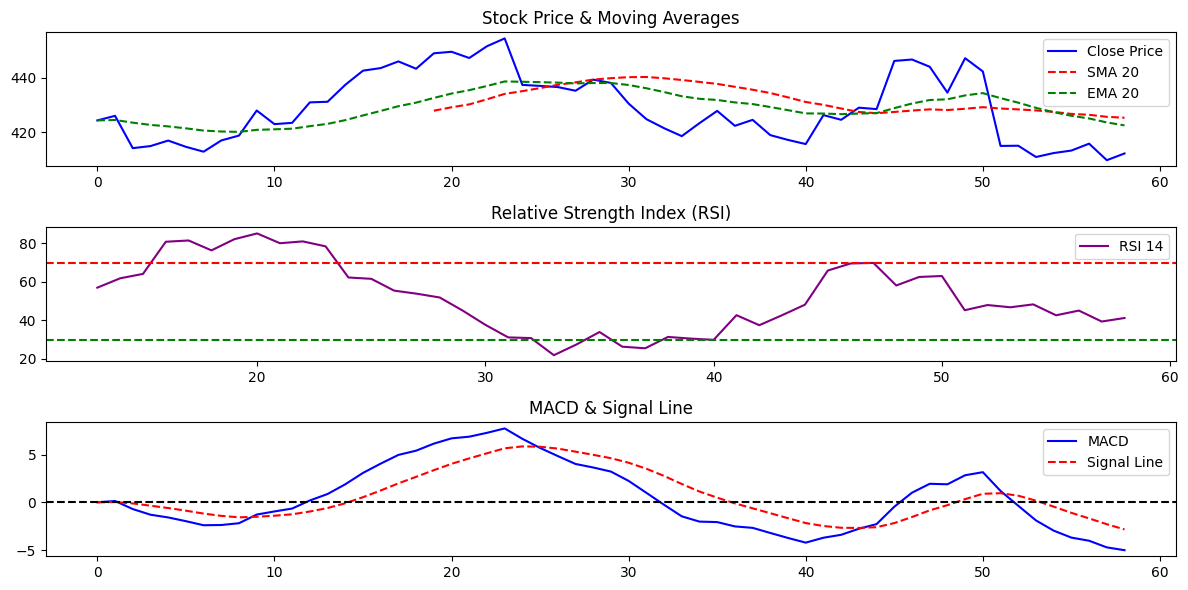

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from tools.trend_analysis_tool import TrendAnalysisTool
from tools.stock_market_tool import StockMarketTool

# Fetch real stock data (e.g., AAPL for past 90 days)
historical_data = StockMarketTool.get_historical_stock("MSFT", days=90)

# Convert to DataFrame
if isinstance(historical_data, list) and len(historical_data) > 0:
    df = pd.DataFrame(historical_data)

    # Compute Trend Indicators
    df["SMA_20"] = TrendAnalysisTool.calculate_sma(df, period=20)
    df["EMA_20"] = TrendAnalysisTool.calculate_ema(df, period=20)
    df["RSI_14"] = TrendAnalysisTool.calculate_rsi(df, period=14)
    df["MACD"], df["Signal"] = TrendAnalysisTool.calculate_macd(df)

    # Plotting the data
    plt.figure(figsize=(12, 6))

    # Plot price and moving averages
    plt.subplot(3, 1, 1)
    plt.plot(df["Close"], label="Close Price", color="blue")
    plt.plot(df["SMA_20"], label="SMA 20", linestyle="dashed", color="red")
    plt.plot(df["EMA_20"], label="EMA 20", linestyle="dashed", color="green")
    plt.title("Stock Price & Moving Averages")
    plt.legend()

    # Plot RSI
    plt.subplot(3, 1, 2)
    plt.plot(df["RSI_14"], label="RSI 14", color="purple")
    plt.axhline(70, linestyle="dashed", color="red")
    plt.axhline(30, linestyle="dashed", color="green")
    plt.title("Relative Strength Index (RSI)")
    plt.legend()

    # Plot MACD
    plt.subplot(3, 1, 3)
    plt.plot(df["MACD"], label="MACD", color="blue")
    plt.plot(df["Signal"], label="Signal Line", linestyle="dashed", color="red")
    plt.axhline(0, linestyle="dashed", color="black")
    plt.title("MACD & Signal Line")
    plt.legend()

    plt.tight_layout()
    plt.show()

else:
    print("Error: No valid historical data retrieved.")


### test data retrieval agent

In [30]:
from agents.data_retrieval_agent import DataRetrievalAgent
import json
agent = DataRetrievalAgent()

Device set to use mps:0


In [43]:
# basic stock price 
query = "Get Tesla's stock price today."
result = agent.process_query(query)
print(json.dumps(result, indent=4))

Ollama Raw Response: model='llama3.2:3b-instruct-q8_0' created_at='2025-02-11T00:42:54.570383Z' done=True done_reason='stop' total_duration=6068685458 load_duration=40366292 prompt_eval_count=101 prompt_eval_duration=202000000 eval_count=87 eval_duration=5822000000 message=Message(role='assistant', content='{\n  "tool_calls": [\n    {\n      "tool": "StockMarketTool",\n      "function": "get_stock_price",\n      "parameters": {\n        "ticker": "TSLA"\n      }\n    }\n  ],\n  "result": {\n    "timestamp": "2024-03-08T10:00:00.000Z",\n    "stockPrice": 207.34\n  }\n}', images=None, tool_calls=None)
{
    "results": [
        {
            "tool": "StockMarketTool",
            "output": {
                "ticker": "TSLA",
                "latest_price": 350.73,
                "high": 362.7,
                "low": 350.51,
                "volume": 75511304,
                "timestamp": "2025-02-11 00:42:54.641827"
            }
        }
    ]
}


In [44]:
# crypto price retrieval
query = "Get Bitcoin price for today."
result = agent.process_query(query)
print(json.dumps(result, indent=4))

Ollama Raw Response: model='llama3.2:3b-instruct-q8_0' created_at='2025-02-11T00:43:03.144943Z' done=True done_reason='stop' total_duration=3787647125 load_duration=34071042 prompt_eval_count=100 prompt_eval_duration=328000000 eval_count=52 eval_duration=3424000000 message=Message(role='assistant', content='```\n{\n  "tool_calls": [\n    {\n      "tool": "CryptoPriceAPI",\n      "function": "get_bitcoin_price",\n      "parameters": {}\n    }\n  ],\n  "result": "42311.32"\n}\n```', images=None, tool_calls=None)
{
    "error": "Invalid JSON response from Ollama",
    "raw_response": "model='llama3.2:3b-instruct-q8_0' created_at='2025-02-11T00:43:03.144943Z' done=True done_reason='stop' total_duration=3787647125 load_duration=34071042 prompt_eval_count=100 prompt_eval_duration=328000000 eval_count=52 eval_duration=3424000000 message=Message(role='assistant', content='```\\n{\\n  \"tool_calls\": [\\n    {\\n      \"tool\": \"CryptoPriceAPI\",\\n      \"function\": \"get_bitcoin_price\",\\n

In [45]:
# sentiment analysis fo financial news
query = "Analyze sentiment on Tesla stock based on recent news."
result = agent.process_query(query)
print(json.dumps(result, indent=4))

Ollama Raw Response: model='llama3.2:3b-instruct-q8_0' created_at='2025-02-11T00:43:31.122564Z' done=True done_reason='stop' total_duration=7031672333 load_duration=38809667 prompt_eval_count=105 prompt_eval_duration=568000000 eval_count=90 eval_duration=6420000000 message=Message(role='assistant', content='{\n  "result": {\n    "sentiment_analyzer": {\n      "sentiments": [\n        {\n          "text": "Tesla reports significant revenue growth in Q4 2023.",\n          "score": 0.75\n        },\n        {\n          "text": "Elon Musk steps down as CEO of Tesla, citing burnout.",\n          "score": -0.5\n        }\n      ]\n    }\n  }\n}', images=None, tool_calls=None)
{
    "results": []
}


In [46]:
# trend analysis on stock
query = "Analyze trend of Apple stock using SMA, EMA, and RSI."
result = agent.process_query(query)
print(json.dumps(result, indent=4))

Ollama Raw Response: model='llama3.2:3b-instruct-q8_0' created_at='2025-02-11T00:43:53.433735Z' done=True done_reason='stop' total_duration=6453631125 load_duration=38447333 prompt_eval_count=110 prompt_eval_duration=1049000000 eval_count=78 eval_duration=5361000000 message=Message(role='assistant', content='```\n{\n  "tool_calls": [\n    {\n      "tool": "FinancialAnalyzer",\n      "function": "analyze_trend",\n      "parameters": {\n        "stock_data": {"sma_window": 50, "ema_window": 20, "rsi_window": 14},\n        "ticker": "AAPL"\n      }\n    }\n  ]\n}\n```', images=None, tool_calls=None)
{
    "error": "Invalid JSON response from Ollama",
    "raw_response": "model='llama3.2:3b-instruct-q8_0' created_at='2025-02-11T00:43:53.433735Z' done=True done_reason='stop' total_duration=6453631125 load_duration=38447333 prompt_eval_count=110 prompt_eval_duration=1049000000 eval_count=78 eval_duration=5361000000 message=Message(role='assistant', content='```\\n{\\n  \"tool_calls\": [\\n  

In [47]:
# multiple tool calls
query = "Get Microsoft's stock price and analyze its sentiment from news."
result = agent.process_query(query)
print(json.dumps(result, indent=4))

Ollama Raw Response: model='llama3.2:3b-instruct-q8_0' created_at='2025-02-11T00:44:05.279077Z' done=True done_reason='stop' total_duration=6355573167 load_duration=82769208 prompt_eval_count=106 prompt_eval_duration=326000000 eval_count=88 eval_duration=5945000000 message=Message(role='assistant', content='```\n{\n  "tool_calls": [\n    {\n      "tool": "NewsSentimentAnalyzer",\n      "function": "analyze_sentiment",\n      "parameters": {\n        "keyword": "Microsoft"\n      }\n    },\n    {\n      "tool": "YahooFinanceAPI",\n      "function": "get_stock_price",\n      "parameters": {\n        "ticker": "MSFT"\n      }\n    }\n  ]\n}\n```', images=None, tool_calls=None)
{
    "error": "Invalid JSON response from Ollama",
    "raw_response": "model='llama3.2:3b-instruct-q8_0' created_at='2025-02-11T00:44:05.279077Z' done=True done_reason='stop' total_duration=6355573167 load_duration=82769208 prompt_eval_count=106 prompt_eval_duration=326000000 eval_count=88 eval_duration=5945000000

In [12]:
import requests
from bs4 import BeautifulSoup
from typing import Optional, Dict, Any, List

class NewsAPIWrapper:
    BASE_URL = "https://newsapi.org/v2/everything"

    def __init__(self, api_key: str):
        self.api_key = api_key

    def get_news(self, query: str, from_date: Optional[str] = None, to_date: Optional[str] = None,
                 sources: Optional[str] = None, sort_by: str = "publishedAt", page_size: int = 20,
                 page: int = 1) -> List[Dict[str, Any]]:
        """Fetch news articles from NewsAPI and return relevant details."""
        params = {
            "q": query,
            "from": from_date,
            "to": to_date,
            "sources": sources,
            "sortBy": sort_by,
            "pageSize": page_size,
            "page": page,
            "apiKey": self.api_key,
        }

        params = {k: v for k, v in params.items() if v is not None}

        try:
            response = requests.get(self.BASE_URL, params=params)
            response.raise_for_status()
            data = response.json()

            if data.get("status") != "ok":
                return {"error": "Invalid response from NewsAPI"}

            articles = data.get("articles", [])
            extracted_articles = [
                {
                    "source": article["source"]["name"],
                    "author": article.get("author"),
                    "title": article.get("title"),
                    "description": article.get("description"),
                    "url": article.get("url"),
                    "urlToImage": article.get("urlToImage"),
                    "publishedAt": article.get("publishedAt"),
                    "content": self.scrape_full_article(article["url"])
                }
                for article in articles
            ]
            return extracted_articles

        except requests.exceptions.RequestException as e:
            return [{"error": str(e)}]

    def scrape_full_article(self, url: str) -> str:
        """Scrapes the full article from the given URL."""
        try:
            headers = {
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
            }
            response = requests.get(url, headers=headers)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, "html.parser")

            # Look for common article containers (modify based on site structure)
            article_content = soup.find("article")  # Many sites use <article> tags
            if not article_content:
                paragraphs = soup.find_all("p")  # Fallback to <p> tags
                full_text = "\n".join(p.get_text() for p in paragraphs)
            else:
                full_text = article_content.get_text(separator="\n")

            return full_text.strip()
        except Exception as e:
            return f"Error fetching full article: {e}"

# Example Usage
if __name__ == "__main__":
    API_KEY = "5ae6adf1cd5b49a48d64dd51fbec18c5"
    news_api = NewsAPIWrapper(api_key=API_KEY)

    # Fetch latest Tesla news
    articles = news_api.get_news(query="tesla", from_date="2025-01-10")

    # Print first full article content
    if articles and "error" not in articles[0]:
        print("Title:", articles[0]["title"])
        print("Full Article Content:\n", articles[0]["content"])
    else:
        print("No articles found or error occurred:", articles)


Title: Musk Says He Has No Interest in Buying TikTok
Full Article Content:
 Despite recent reports to the contrary, Elon Musk has no plans to buy TikTok.
That’s according to comments from Musk himself last month at the WELT Economic Summit in Germany, according to a video posted Saturday (Feb. 8) by The WELT Group. 
“I haven’t made a bid for TikTok, nor do I have any plans regarding what I would do if I owned it,” Musk said in the video.
The multibillionaire’s name was mentioned last month as a possible buyer as the deadline to a ban on TikTok ticked down in the U.S. American lawmakers had voted last year to compel ByteDance, TikTok’s owner, to either sell the video sharing platform or risk being banned in the U.S., legislation born out of national security concerns. 
That ban briefly went into effect on Jan. 19, though President Donald Trump — just before taking office — promised he would not enforce the law, and TikTok began restoring services. Trump later signed an executive order g